# Analysis of flight delays in the United States
### The objective of this article is to display average delays for multiple flights carriers and factors responsible for it
### Github link: https://github.com/solankis9545/solankis9545.github.io.git
### Author: Sunny Sanjay Solanki

Traveling on a plane is a common part of today's modern life. Business travels, travels to visit family, friends or for a vacation has become a part of everyone's life where the time taken to travel should be as minimum as possible. This has been possible using airlines which are by far the fastest and safest way to travel. Although, it does cut down the travel time it comes with its own set of annoyances. From security checks, crowded airports, seasonal changes, and multiple other reasons, people do dislike air travel. From this article, I try to focus my attention on these problems and try to reflect the best possible carriers and seasons for people to travel within the United States.<br>
Sources:<br>
https://medium.com/@saurabhthakrani/analyzing-flight-delays-d8cba808bcd3 <br>
https://blog.bookit.com/an-analysis-of-flight-delays-in-the-united-states/
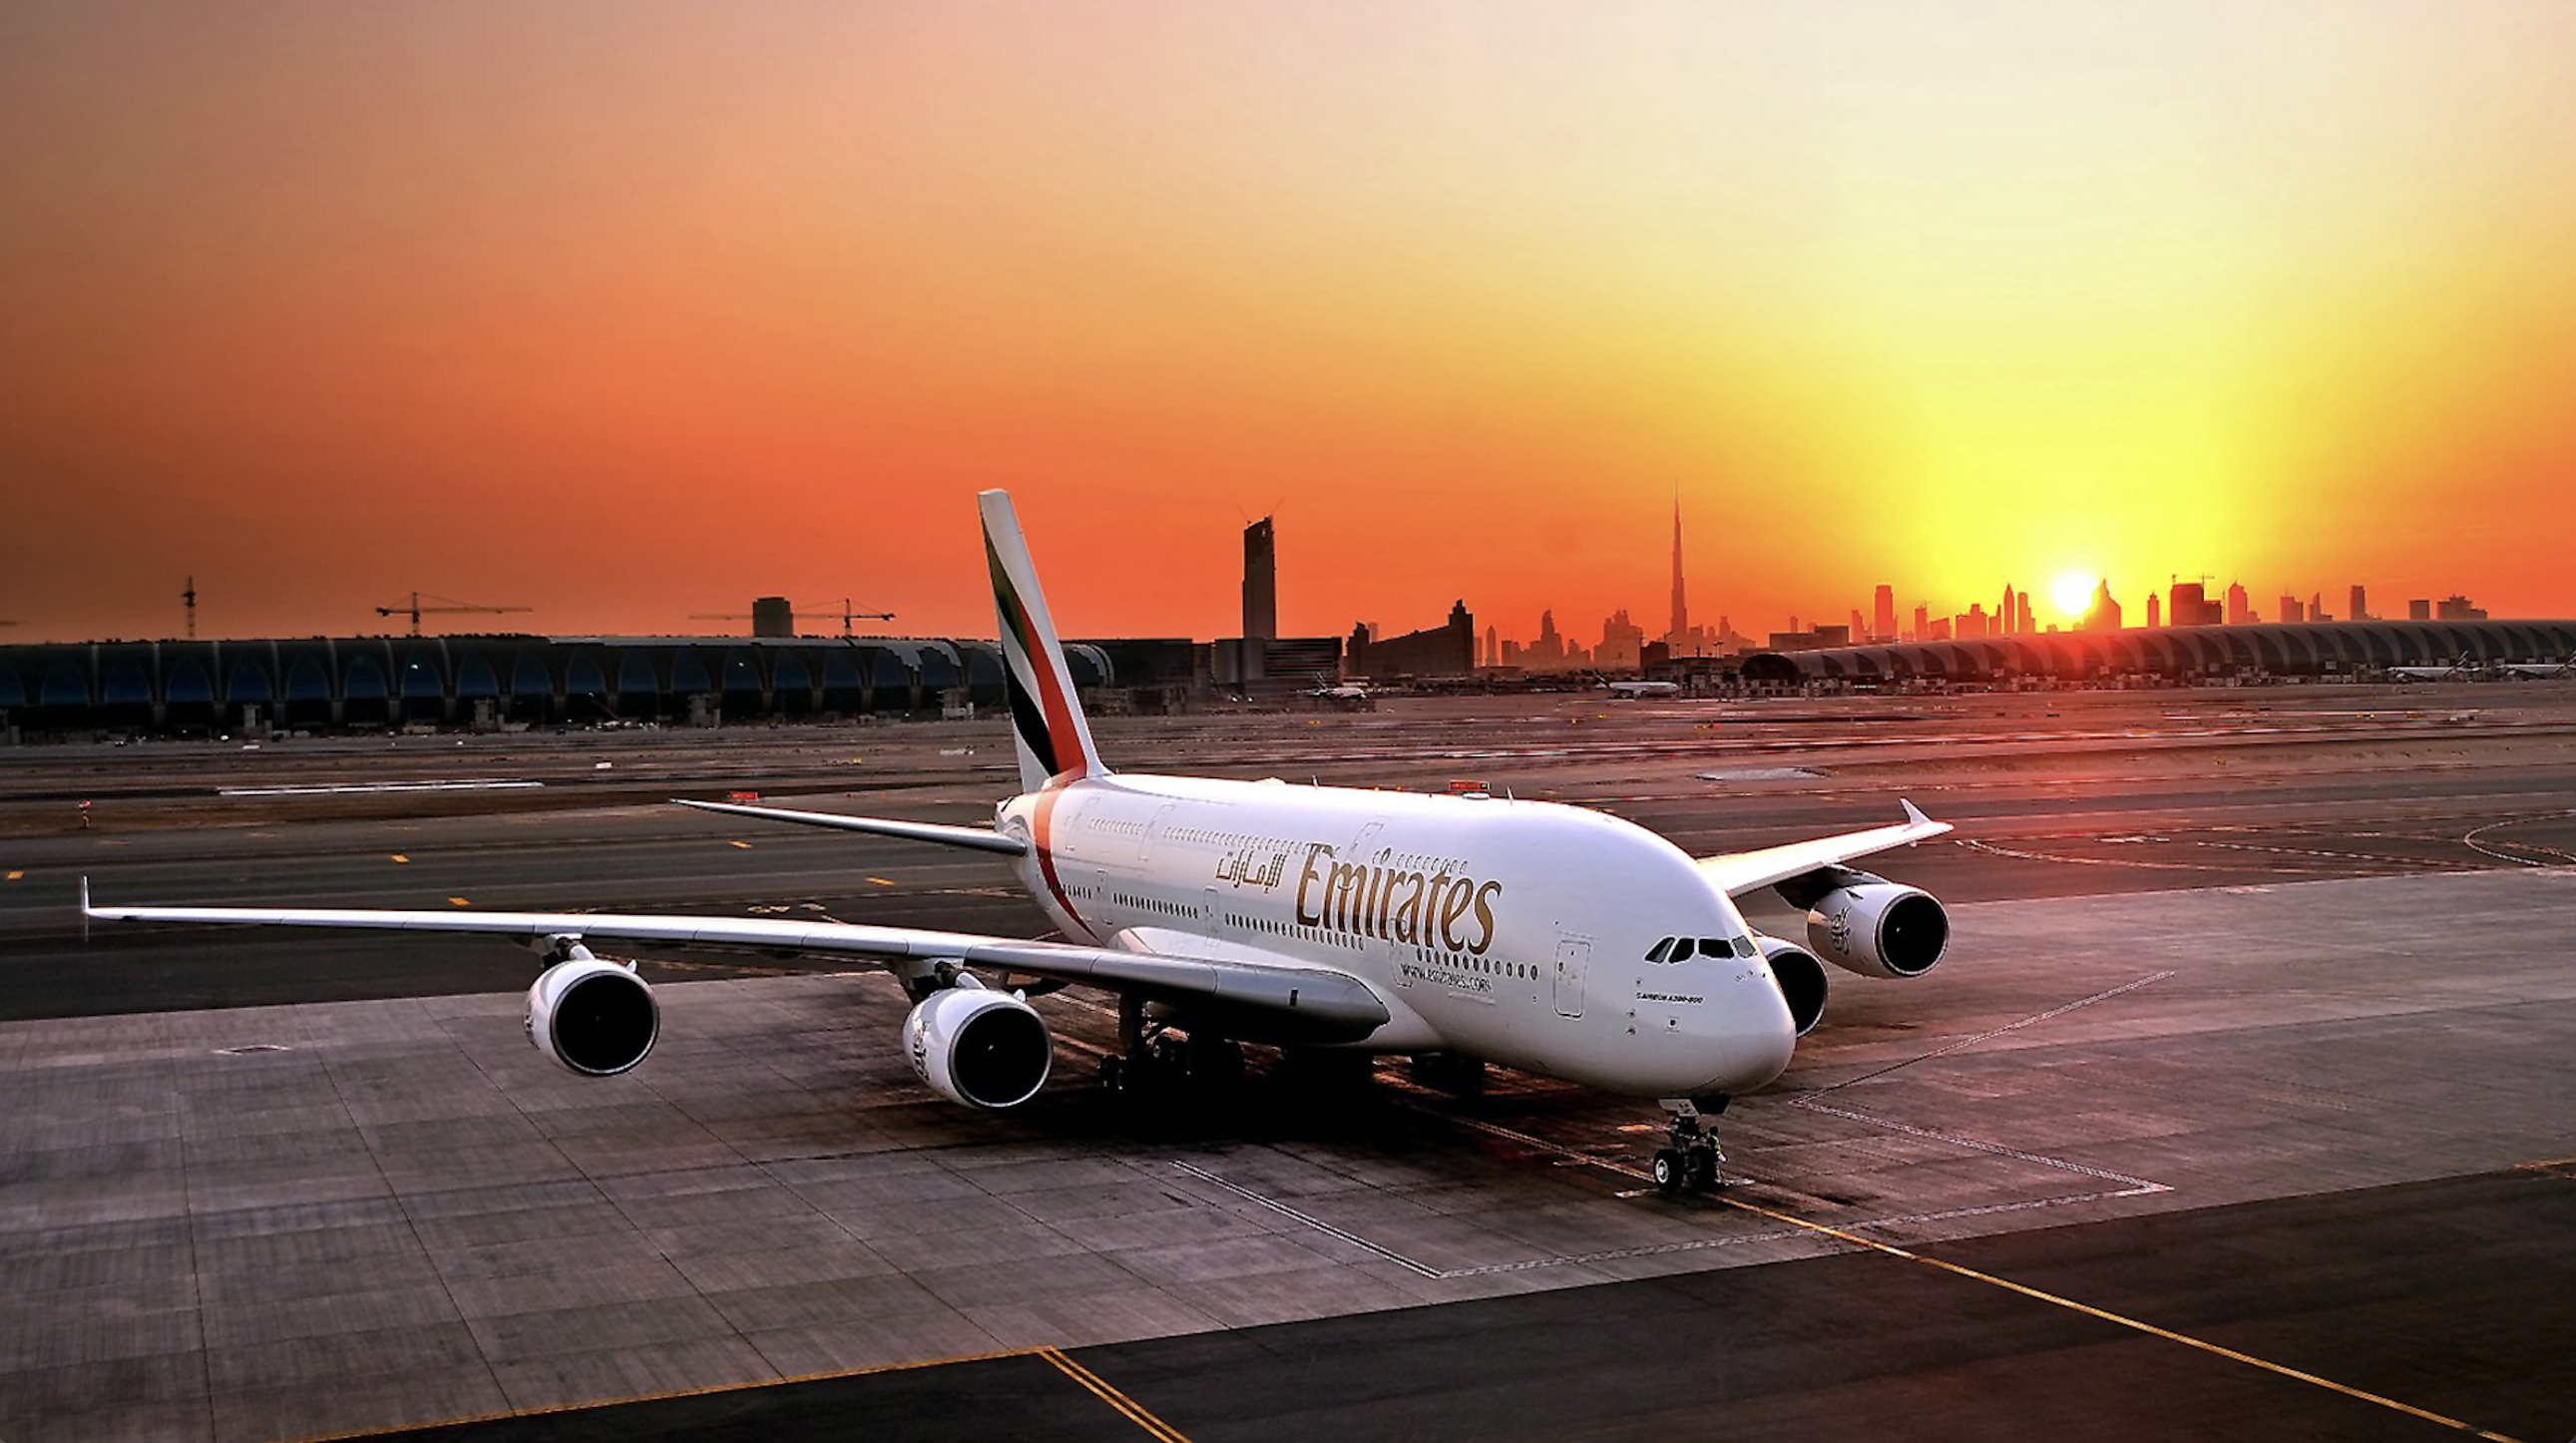

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas
import ipywidgets
from ipywidgets import interactive
from matplotlib.pyplot import figure

My dataset is named as R4Datascience which consists of the following tables:
1. airlines - contains information about the airline companies and their respective flight numbers.
2. airports - data related to geographical position of the airports.
3. flights - day to day information of the flights going in and out of the respective airport.
4. new - just contains data about multiple states and is not used for any further analysis or visualizations.
5. planes - model and name of the aircraft supplier.
6. weather - weather conditions at the time of the flight.

Data Source:https://data.world/cannata/r-4-datascience<br>
The dataset is 32.45MB in size. It consists of 7 tables with a total of 64 columns and roughly 367,753 rows.

Some of the tables from my dataset are as follows:

In [2]:
airlines = pd.read_csv('airlines.csv')

In [3]:
airlines

carrier                         name
0       9E            Endeavor Air Inc.
1       AA       American Airlines Inc.
2       AS         Alaska Airlines Inc.
3       B6              JetBlue Airways
4       DL         Delta Air Lines Inc.
5       EV     ExpressJet Airlines Inc.
6       F9       Frontier Airlines Inc.
7       FL  AirTran Airways Corporation
8       HA       Hawaiian Airlines Inc.
9       MQ                    Envoy Air
10      OO        SkyWest Airlines Inc.
11      UA        United Air Lines Inc.
12      US              US Airways Inc.
13      VX               Virgin America
14      WN       Southwest Airlines Co.
15      YV           Mesa Airlines Inc.

In [4]:
flights = pd.read_csv('flights.csv')

In [5]:
flights

year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0       2013      1    1     517.0             515        2.0     830.0   
1       2013      1    1     533.0             529        4.0     850.0   
2       2013      1    1     542.0             540        2.0     923.0   
3       2013      1    1     544.0             545       -1.0    1004.0   
4       2013      1    1     554.0             600       -6.0     812.0   
...      ...    ...  ...       ...             ...        ...       ...   
336771  2013      9   30       NaN            1455        NaN       NaN   
336772  2013      9   30       NaN            2200        NaN       NaN   
336773  2013      9   30       NaN            1210        NaN       NaN   
336774  2013      9   30       NaN            1159        NaN       NaN   
336775  2013      9   30       NaN             840        NaN       NaN   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest  \
0                  819       11.0      UA    1545  N14228    EWR  IAH   
1                  830       20.0      UA    1714  N24211    LGA  IAH   
2                  850       33.0      AA    1141  N619AA    JFK  MIA   
3                 1022      -18.0      B6     725  N804JB    JFK  BQN   
4                  837      -25.0      DL     461  N668DN    LGA  ATL   
...                ...        ...     ...     ...     ...    ...  ...   
336771            1634        NaN      9E    3393     NaN    JFK  DCA   
336772            2312        NaN      9E    3525     NaN    LGA  SYR   
336773            1330        NaN      MQ    3461  N535MQ    LGA  BNA   
336774            1344        NaN      MQ    3572  N511MQ    LGA  CLE   
336775            1020        NaN      MQ    3531  N839MQ    LGA  RDU   

        air_time  distance  hour  minute             time_hour  
0          227.0      1400     5      15  2013-01-01T05:00:00Z  
1          227.0      1416     5      29  2013-01-01T05:00:00Z  
2          160.0      1089     5      40  2013-01-01T05:00:00Z  
3          183.0      1576     5      45  2013-01-01T05:00:00Z  
4          116.0       762     6       0  2013-01-01T06:00:00Z  
...          ...       ...   ...     ...                   ...  
336771       NaN       213    14      55  2013-09-30T14:00:00Z  
336772       NaN       198    22       0  2013-09-30T22:00:00Z  
336773       NaN       764    12      10  2013-09-30T12:00:00Z  
336774       NaN       419    11      59  2013-09-30T11:00:00Z  
336775       NaN       431     8      40  2013-09-30T08:00:00Z  

[336776 rows x 19 columns]

In [6]:
planes = pd.read_csv('planes.csv')

In [7]:
airports = pd.read_csv('airports.csv')

Below, I tried merging airlines and flights dataframe to obtain information related to a specific flight and its route as well as departure and arrival times since I will be using the data obtained to perform further analysis. I performed an inner join which matches the columns in both the tables based on 'carrier' as the key. Further, as I try to build an interactive dashboard to help user find sources and destinations for multiple airline carriers, I try merging the later created airlines_flights with airports to find out latitude and longitudes for that particular source and destination.

In [8]:
airlines_flights = pd.merge(airlines, flights, how = 'inner', left_on=['carrier'], right_on=['carrier'])

In [9]:
final_destinations = pd.merge(airlines_flights, airports, how = 'inner', left_on=['dest'], right_on=['faa'])

In [10]:
final_source = pd.merge(airlines_flights, airports, how = 'inner', left_on=['origin'], right_on=['faa'])

## Airlines and their respective sources & destinations served within the United States

I tried creating a dashboard where the user can select multiple airlines and states served by them within the USA. I have created a dropdown where the user can select multiple airlines and a second dropdown where the user can sort those selected airlines based on their origin or destination airports. I further used geopandas to map the latitudes and longitudes of those airports on the map and highlight them by adding a layer to the already existing base map. By using this interactivity and dashboard, the user might be able to find out destinations for multiple airline carriers and their respective locations covered within the USA. Below the map, I even added some extra text where the user might be able to decipher the locations based on their shortcodes to find out more information on the points being depicted in the map above.

In [11]:
states = geopandas.read_file('https://www2.census.gov/geo/tiger/TIGER2020/STATE/tl_2020_us_state.zip')

In [12]:
gdf = geopandas.GeoDataFrame(airports, geometry=geopandas.points_from_xy(airports.lon, airports.lat))

In [13]:
from ipywidgets import interactive

states = geopandas.read_file('https://www2.census.gov/geo/tiger/TIGER2020/STATE/tl_2020_us_state.zip')

def map_source_destinations(name, type_1):
    fig, ax = plt.subplots(figsize=(18,10))
    
    if type_1 == 'Destinations':
        airline_name = final_destinations[final_destinations['name_x'] == name]
        dest_alt = geopandas.GeoDataFrame(airline_name, geometry=geopandas.points_from_xy(airline_name.lon, airline_name.lat))
        

        destinations_served = str(airline_name['dest'].unique())

        states.plot(ax=ax)
        dest_alt.plot(ax=ax, color='lightgreen')
        ax.set_xlim(-180,-60)
        ax.set_ylim(15, 75)
        plt.title(name + ' with their respective destinations served within US')
        plt.figtext(0.5, 0, 'Destinations served: ' + destinations_served, ha="center", fontsize=12)
    else:
        airline_name = final_source[final_source['name_x'] == name]
        source_alt = geopandas.GeoDataFrame(airline_name, geometry=geopandas.points_from_xy(airline_name.lon, airline_name.lat))

        origins_served = str(airline_name['origin'].unique())

        states.plot(ax=ax)
        source_alt.plot(ax=ax, color='lightgreen')
        ax.set_xlim(-180,-60)
        ax.set_ylim(15, 75)
        plt.title(name + ' with their respective origins served within US')
        plt.figtext(0.5, 0, 'Origins served: ' + origins_served, ha="center", fontsize=14)
    plt.show()
    

plot = interactive(map_source_destinations, 
                   name = ipywidgets.Dropdown(  
                      value='Endeavor Air Inc.',
                      options=['Endeavor Air Inc.', 'Delta Air Lines Inc.',
       'ExpressJet Airlines Inc.', 'Envoy Air', 'SkyWest Airlines Inc.',
       'United Air Lines Inc.', 'JetBlue Airways', 'Mesa Airlines Inc.',
       'Southwest Airlines Co.', 'American Airlines Inc.',
       'US Airways Inc.', 'AirTran Airways Corporation', 'Virgin America',
       'Alaska Airlines Inc.', 'Frontier Airlines Inc.',
       'Hawaiian Airlines Inc.'],
                      description='Airline Name'   
                   ),
                   type_1 = ipywidgets.Dropdown(
                       value='Origins',
                      options=['Origins', 'Destinations'],
                      description='Sort by'
                  ),
                  )
plot

interactive(children=(Dropdown(description='Airline Name', options=('Endeavor Air Inc.', 'Delta Air Lines Inc.…

## Trends in delay times for multiple airline carriers

I tried plotting a simple line plot using pyplot from matplotlib library. The data I used to create a simple plot is for just us_airways for now. Here, I try to show the differences in mean arriving delay and departure delay times for a given year 2013 using months as a scale. This helps a particular airline carrier to see the trends in delay and find out other factors causing it using further analysis. Finally, I try to create an interactive element using dropdown which helps user select multiple values based on a given airline and see the trends in delay times.
* For scale on y-axis, we consider scale as degree celsius or fahrenheit for temperature while for delay we consider minutes.

In [14]:
def line_plot(xaxis):
    new_airways = airlines_flights[airlines_flights['name']==xaxis]
    x = new_airways.groupby('month')['dep_delay'].mean()
    y = new_airways.groupby('month')['arr_delay'].mean()
    plt.plot(x, label='departure delay')
    plt.plot(y, label='arrival delay')
    plt.xlabel('Months')
    plt.ylabel('Time (in minutes)')
    label = 'Mean of departure and arrival delay for ' + xaxis
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

plot = interactive(line_plot, 
                  xaxis = ipywidgets.Dropdown(
                      value='Endeavor Air Inc.',
                      options=['Endeavor Air Inc.', 'American Airlines Inc.',
                               'Alaska Airlines Inc.', 'JetBlue Airways', 'Delta Air Lines Inc.',
                               'ExpressJet Airlines Inc.', 'Frontier Airlines Inc.',
                               'AirTran Airways Corporation', 'Hawaiian Airlines Inc.',
                               'Envoy Air', 'SkyWest Airlines Inc.', 'United Air Lines Inc.',
                               'US Airways Inc.', 'Virgin America', 'Southwest Airlines Co.',
                               'Mesa Airlines Inc.'],
                      description='Airlines'
                  )
                  )
plot

interactive(children=(Dropdown(description='Airlines', options=('Endeavor Air Inc.', 'American Airlines Inc.',…

Negative values in the above graph for y-axis cannot be neglected since they represent the early arrival and departures for a given airline which means that a given flight was before the actual arrival or departure time.

## Effects of weather conditions on airline delays

In this plot, I have tried merging the weather and flights datasets. This merged dataset is further used to plot grouped bar charts that represent multiple factors affecting the departure times of flights and hence, can be compared effectively. This plot can be used to study the effect of multiple factors such as wind speed, temperature, dew, wind pressure, humidity, and precipitation against the flights which are scheduled ahead. Some of these factors do affect the departure time and may lead to further delays at arrival or other airlines scheduled. 

In [15]:
weather = pd.read_csv('weather.csv')

In [16]:
weather_flights = pd.merge(flights, weather, how = 'inner', left_on=['time_hour'], right_on=['time_hour'])

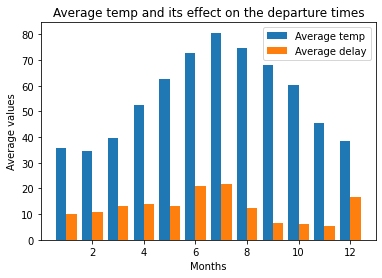

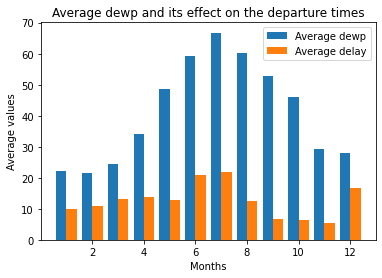

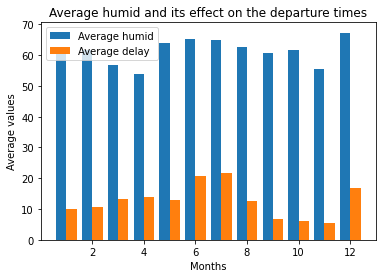

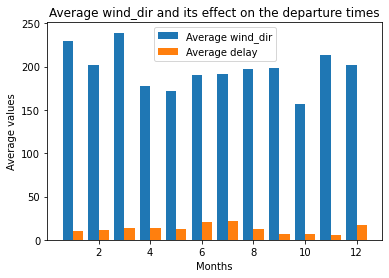

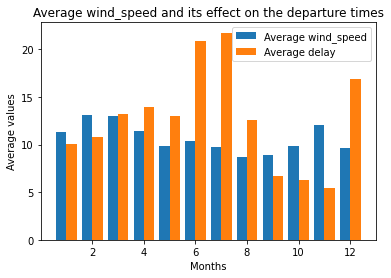

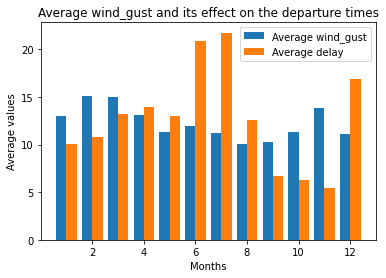

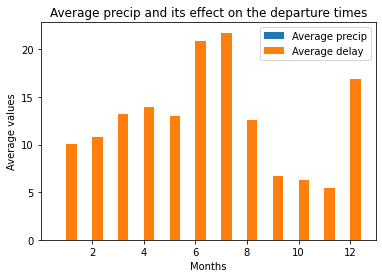

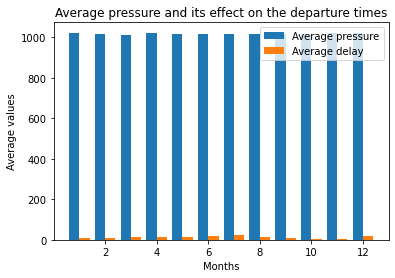

In [17]:
def calc_factors(factor):
    y = weather_flights.groupby('month_x')[factor].mean()
    x = weather_flights.groupby('month_x')['dep_delay'].mean()
    plt.bar(y.index - 0.2, y.values, 0.4, label='Average '+factor)
    plt.bar(x.index + 0.2, x.values, 0.4, label='Average delay')
    plt.xlabel('Months')
    plt.ylabel('Average values')
    plt.title('Average '+ factor + ' and its effect on the departure times')
    plt.legend()
    plt.show()

for i in weather_flights.columns[24:]:
    calc_factors(i)

Finally, I would like to conclude my article by describing results from the above plots:
1. First plot does give well-detailed information about the destinations that multiple airline carriers travel to within the USA. This can be further extended to depict major airlines carriers across the world which might help users to effectively find out carriers concerning the countries that they wish to travel to.
2. Second plot compares delays in arrival and departures for airlines carriers. This information is critical for airline operators ad it can be further used to find out the underlying reasons for the delay. This can be further connected interactively to the last series of plots that I built in the above article as they can be used to differentiate factors responsible for the delay.
3. Finally, I plotted a series of graphs to represent multiple factors responsible for the departure delays for all the carriers accumulated together.

Multiple datasets have been used to finally build the above plots and have been cleaned before loading those up into my final project. NaN values in the above tables cannot be neglected since they might represent multiple factors due to which a flight might be canceled or might be a failure in recording the details for that particular flight. 

Do go through the article once and let me know if you have any further questions concerning datasets or graphs shown above in the discussion forum. Thank you for your time!